## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Load the Taxi Data and Weather Data

### Taxi Data

In [2]:
taxi_df = pd.read_csv("../clean_data/TaxiData_Jan17-Jun17.gz", compression="gzip")

In [3]:
taxi_df.shape

(1471188, 9)

In [4]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_duration,holiday
0,2017-01-01 00:00:05,2017-01-01 00:15:36,1,8.47,138,262,38.55,931.0,False
1,2017-01-01 00:00:12,2017-01-01 00:09:48,1,5.30,138,192,17.30,576.0,False
2,2017-01-01 00:00:17,2017-01-01 00:19:40,2,13.97,138,181,50.44,1163.0,False
3,2017-01-01 00:00:21,2017-01-01 00:12:09,1,6.90,138,80,21.30,708.0,False
4,2017-01-01 00:00:33,2017-01-01 00:31:58,2,10.50,138,230,42.34,1885.0,False


In [6]:
taxi_df.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
PULocationID               int64
DOLocationID               int64
total_amount             float64
trip_duration            float64
holiday                     bool
dtype: object

In [7]:
taxi_df["tpep_pickup_datetime"] = pd.DatetimeIndex(taxi_df.tpep_pickup_datetime).tz_localize('America/New_York')
taxi_df["tpep_dropoff_datetime"] = pd.DatetimeIndex(taxi_df.tpep_dropoff_datetime).tz_localize('America/New_York')

In [8]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_duration,holiday
0,2017-01-01 00:00:05-05:00,2017-01-01 00:15:36-05:00,1,8.47,138,262,38.55,931.0,False
1,2017-01-01 00:00:12-05:00,2017-01-01 00:09:48-05:00,1,5.30,138,192,17.30,576.0,False
2,2017-01-01 00:00:17-05:00,2017-01-01 00:19:40-05:00,2,13.97,138,181,50.44,1163.0,False
3,2017-01-01 00:00:21-05:00,2017-01-01 00:12:09-05:00,1,6.90,138,80,21.30,708.0,False
4,2017-01-01 00:00:33-05:00,2017-01-01 00:31:58-05:00,2,10.50,138,230,42.34,1885.0,False


### Resample Analysis

In [9]:
taxi_perhour = taxi_df.copy()

In [10]:
taxi_perhour.set_index("tpep_pickup_datetime", inplace=True)

In [11]:
taxi_perhour.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_duration,holiday
tpep_pickup_datetime,,,,,,,,
2017-01-01 00:00:05-05:00,2017-01-01 00:15:36-05:00,1,8.47,138,262,38.55,931.0,False
2017-01-01 00:00:12-05:00,2017-01-01 00:09:48-05:00,1,5.30,138,192,17.30,576.0,False
2017-01-01 00:00:17-05:00,2017-01-01 00:19:40-05:00,2,13.97,138,181,50.44,1163.0,False
2017-01-01 00:00:21-05:00,2017-01-01 00:12:09-05:00,1,6.90,138,80,21.30,708.0,False
2017-01-01 00:00:33-05:00,2017-01-01 00:31:58-05:00,2,10.50,138,230,42.34,1885.0,False


In [12]:
output = taxi_perhour.resample("H")[["passenger_count"]].count()

In [13]:
output.rename(columns = {"passenger_count" : "pickup_counts"}, inplace=True)

In [14]:
output.head()

,pickup_counts
tpep_pickup_datetime,
2017-01-01 00:00:00-05:00,53
2017-01-01 01:00:00-05:00,3
2017-01-01 02:00:00-05:00,0
2017-01-01 03:00:00-05:00,4
2017-01-01 04:00:00-05:00,4


### Weather Dataframe

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
weather_df = pd.read_csv("../clean_data/weather_NY.csv")

In [17]:
weather_df.columns

Index(['dt', 'dt_iso', 'city_id', 'city_name', 'lat', 'lon', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [18]:
weather_df["date"] = pd.DatetimeIndex(pd.to_datetime(weather_df.dt, unit="s")) \
                    .tz_localize('UTC').tz_convert('America/New_York')

In [19]:
weather_df.set_index("date", inplace=True)

In [20]:
weather_df.columns

Index(['dt', 'dt_iso', 'city_id', 'city_name', 'lat', 'lon', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [21]:
weather_df.head()

,dt,dt_iso,city_id,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_24h,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 09:00:00-04:00,1349096400,2012-10-01 13:00:00 +0000 UTC,5128581,NaN,NaN,NaN,288.22,286.15,294.26,1012,NaN,NaN,58,7,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
2012-10-02 10:00:00-04:00,1349186400,2012-10-02 14:00:00 +0000 UTC,5128581,NaN,NaN,NaN,290.15,288.15,294.82,1012,NaN,NaN,51,5,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
2012-10-02 11:00:00-04:00,1349190000,2012-10-02 15:00:00 +0000 UTC,5128581,NaN,NaN,NaN,291.32,289.82,296.48,1012,NaN,NaN,52,5,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
2012-10-02 12:00:00-04:00,1349193600,2012-10-02 16:00:00 +0000 UTC,5128581,NaN,NaN,NaN,291.78,290.15,295.93,0,NaN,NaN,0,2,303,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,92,800,Clear,sky is clear,02d
2012-10-02 13:00:00-04:00,1349197200,2012-10-02 17:00:00 +0000 UTC,5128581,NaN,NaN,NaN,292.74,291.15,296.48,0,NaN,NaN,0,1,285,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,92,800,Clear,sky is clear,02d


In [22]:
weather_df.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='date', length=49811)

In [23]:
weather_df.loc[weather_df.index.year == 2017, :].rain_3h.value_counts()

0.8900    4
0.8575    3
0.6900    3
0.5850    3
0.1050    3
3.2275    3
2.8950    3
Name: rain_3h, dtype: int64

In [24]:
weather_df.drop(["dt", "dt_iso", "city_id", "city_name", "lat", "lon", "weather_icon", "grnd_level", \
                 "sea_level", "clouds_all", "weather_id", "rain_1h", "rain_3h", "rain_24h", \
                 "rain_today", "snow_1h", "snow_3h", "snow_24h", "snow_today"], axis=1, inplace=True)

In [25]:
weather_df.dtypes

temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
weather_main            object
weather_description     object
dtype: object

In [63]:
weather_df.head(50)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
date,,,,,,,,,
2012-10-01 09:00:00-04:00,288.22,286.15,294.26,1012,58,7,260,Clouds,few clouds
2012-10-02 10:00:00-04:00,290.15,288.15,294.82,1012,51,5,270,Clouds,few clouds
2012-10-02 11:00:00-04:00,291.32,289.82,296.48,1012,52,5,270,Clouds,few clouds
2012-10-02 12:00:00-04:00,291.78,290.15,295.93,0,0,2,303,Clear,sky is clear
2012-10-02 13:00:00-04:00,292.74,291.15,296.48,0,0,1,285,Clear,sky is clear
2012-10-02 14:00:00-04:00,293.82,293.15,295.15,1011,46,6,250,Clouds,scattered clouds
2012-10-02 15:00:00-04:00,294.08,293.15,295.15,0,0,1,288,Clear,sky is clear
2012-10-02 16:00:00-04:00,294.72,294.15,295.37,1012,43,5,240,Clouds,scattered clouds
2012-10-02 17:00:00-04:00,294.85,293.15,295.93,0,0,1,269,Clear,sky is clear


## Creating the Merged Dataframe for Visualizations

In [27]:
merged_df = pd.merge(left=output, right=weather_df, left_index=True, right_index=True)

In [28]:
merged_df.head()

,pickup_counts,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
2017-01-01 05:00:00+00:00,53,279.07,277.15,280.15,1013,45,2,250,Clouds,overcast clouds
2017-01-01 06:00:00+00:00,3,279.14,277.15,281.15,1013,45,2,260,Clouds,overcast clouds
2017-01-01 07:00:00+00:00,0,279.21,276.15,283.15,1012,45,3,270,Rain,light rain
2017-01-01 07:00:00+00:00,0,279.21,276.15,283.15,1012,45,3,270,Snow,light snow
2017-01-01 08:00:00+00:00,4,279.43,277.15,285.15,1013,45,3,270,Clouds,overcast clouds


In [29]:
merged_df.shape

(5977, 10)

In [30]:
merged_df.head()

,pickup_counts,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
2017-01-01 05:00:00+00:00,53,279.07,277.15,280.15,1013,45,2,250,Clouds,overcast clouds
2017-01-01 06:00:00+00:00,3,279.14,277.15,281.15,1013,45,2,260,Clouds,overcast clouds
2017-01-01 07:00:00+00:00,0,279.21,276.15,283.15,1012,45,3,270,Rain,light rain
2017-01-01 07:00:00+00:00,0,279.21,276.15,283.15,1012,45,3,270,Snow,light snow
2017-01-01 08:00:00+00:00,4,279.43,277.15,285.15,1013,45,3,270,Clouds,overcast clouds


## Hour Level Analysis

### Total Hours with different Weather conditions (2017)

In [31]:
out = merged_df.groupby(["weather_main"])["weather_main"].count()

In [32]:
out

weather_main
Clear           1003
Clouds          1512
Drizzle          381
Dust               3
Fog              296
Haze             171
Mist            1334
Rain             994
Snow             200
Squall             1
Thunderstorm      82
Name: weather_main, dtype: int64

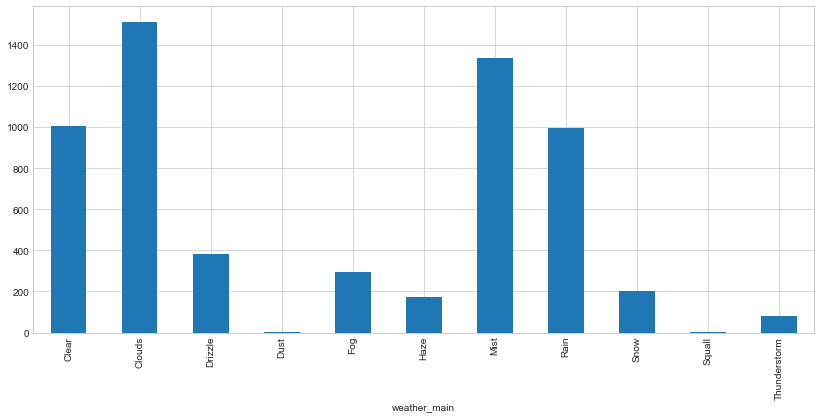

In [33]:
plt.figure(figsize=(14, 6))
out.plot(kind="bar")

### Total Taxi Trips in Different Weather Conditions (taken hourwise)

In [34]:
out = merged_df.groupby("weather_main")["pickup_counts"].sum()

In [35]:
out

weather_main
Clear           319117
Clouds          599035
Drizzle         118299
Dust               104
Fog              69403
Haze             70198
Mist            384923
Rain            320658
Snow             43871
Squall             649
Thunderstorm     25999
Name: pickup_counts, dtype: int64

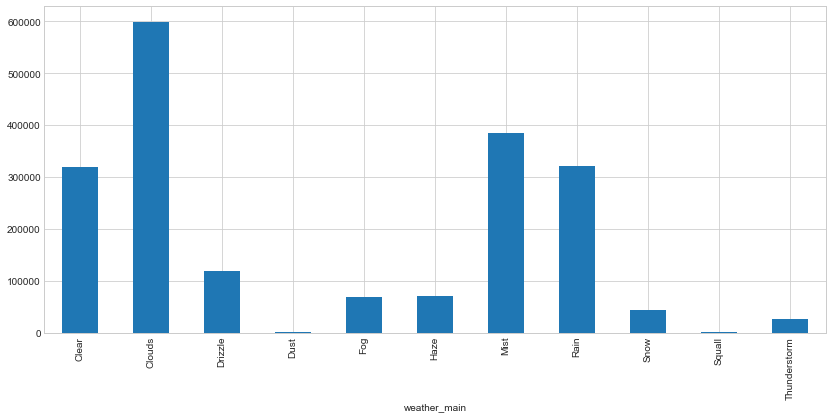

In [36]:
plt.figure(figsize=(14, 6))
out.plot(kind="bar")

### Average taxi trips in different weather conditions for every hour

In [37]:
out = merged_df.groupby("weather_main")["pickup_counts"].mean()

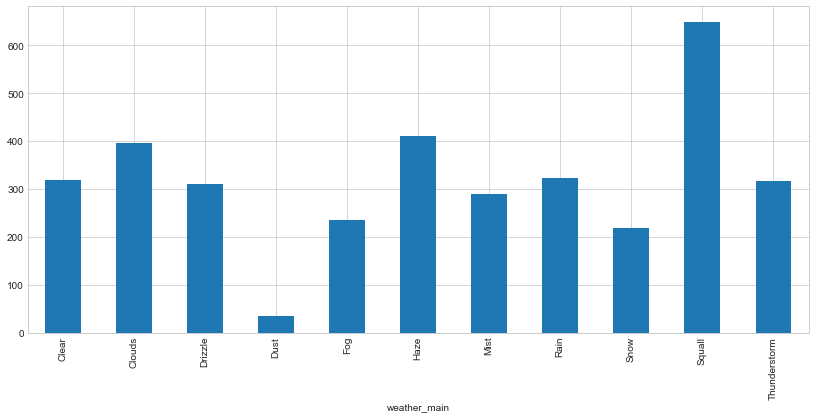

In [38]:
plt.figure(figsize=(14, 6))
out.plot(kind="bar")

### Monthly Effect of Weather on Taxi Pickups

In [39]:
monthly_df = merged_df.groupby([pd.TimeGrouper("1M"), "weather_main"])["pickup_counts"].mean()

In [41]:
monthly_df

                           weather_main
2017-01-31 00:00:00+00:00  Clear           219.353448
                           Clouds          327.698745
                           Drizzle         299.966292
                           Fog             214.904762
                           Haze            288.047619
                           Mist            266.597315
                           Rain            334.129808
                           Snow            219.842857
                           Thunderstorm      2.000000
2017-02-28 00:00:00+00:00  Clear           265.505376
                           Clouds          351.019084
                           Drizzle         354.250000
                           Fog             131.983871
                           Haze            308.800000
                           Mist            220.084615
                           Rain            246.666667
                           Snow            165.588235
                           Thunderstorm   

In [42]:
monthly_df = monthly_df.unstack(level=1)

In [43]:
monthly_df

weather_main,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Snow,Squall,Thunderstorm
2017-01-31 00:00:00+00:00,219.353448,327.698745,299.966292,NaN,214.904762,288.047619,266.597315,334.129808,219.842857,NaN,2.000000
2017-02-28 00:00:00+00:00,265.505376,351.019084,354.250000,NaN,131.983871,308.800000,220.084615,246.666667,165.588235,NaN,78.666667
2017-03-31 00:00:00+00:00,321.681416,375.236607,293.763636,NaN,278.123077,402.882353,299.928251,286.353659,253.632911,NaN,254.222222
2017-04-30 00:00:00+00:00,257.329268,403.318182,313.931373,100.0,274.911111,508.551724,334.138889,330.370558,NaN,NaN,355.750000
2017-05-31 00:00:00+00:00,389.000000,472.332016,292.297619,NaN,387.218750,514.318182,313.810078,325.398104,NaN,649.0,438.800000
2017-06-30 00:00:00+00:00,378.957983,451.916256,380.193548,2.0,166.931034,513.677419,271.211538,366.136986,NaN,NaN,348.794118
2017-07-31 00:00:00+00:00,NaN,361.000000,NaN,NaN,NaN,NaN,433.000000,359.500000,NaN,NaN,433.000000


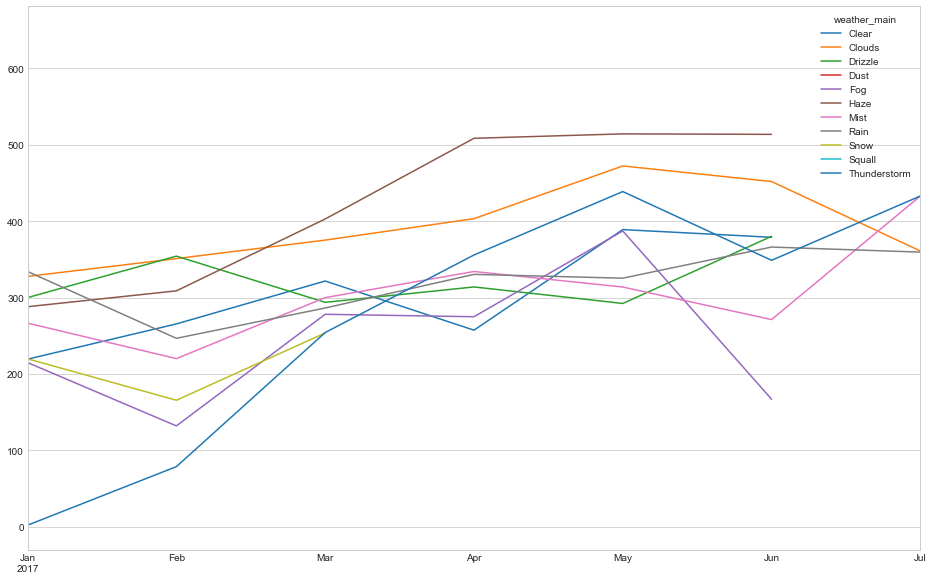

In [61]:
monthly_df.plot(kind="line", figsize=(16, 10))

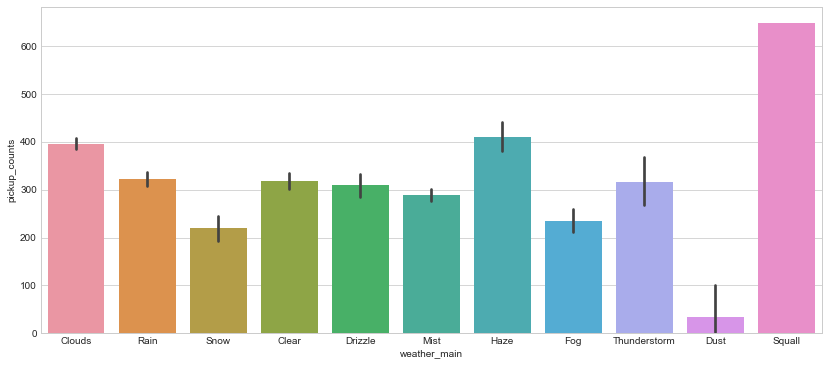

In [38]:
plt.figure(figsize=(14, 6))
sns.barplot(x = "weather_main", y = "pickup_counts", data=merged_df)

## Check the weather description

In [84]:
check_df = pd.read_csv("../clean_data/2017_combined_data.csv")

In [99]:
monthly_df = check_df.groupby(["weather_main", "weather_description"]).agg({"pickup_count": "mean", "Passengers": "mean"})

In [100]:
monthly_df = monthly_df.reset_index()

In [136]:
check = monthly_df.loc[monthly_df["weather_main"] =="Rain", :]

In [137]:
check

,weather_main,weather_description,pickup_count,Passengers
14,Rain,freezing rain,214.000000,1171.428571
15,Rain,heavy intensity rain,332.472222,1098.910714
16,Rain,light intensity shower rain,1.000000,NaN
17,Rain,light rain,327.640876,1268.706458
18,Rain,moderate rain,310.907080,1231.562130
19,Rain,shower rain,94.000000,600.000000


In [138]:
check = check.sort_values(by="pickup_count")

In [140]:
check = check.reset_index()

In [142]:
check

,index,weather_main,weather_description,pickup_count,Passengers
0,16,Rain,light intensity shower rain,1.000000,NaN
1,19,Rain,shower rain,94.000000,600.000000
2,14,Rain,freezing rain,214.000000,1171.428571
3,18,Rain,moderate rain,310.907080,1231.562130
4,17,Rain,light rain,327.640876,1268.706458
5,15,Rain,heavy intensity rain,332.472222,1098.910714


In [143]:
check["weather_description"]

0    light intensity shower rain
1                    shower rain
2                  freezing rain
3                  moderate rain
4                     light rain
5           heavy intensity rain
Name: weather_description, dtype: object

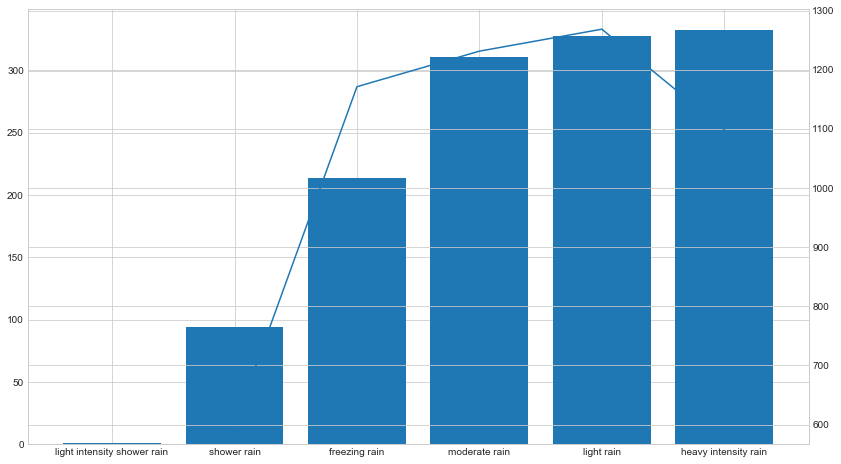

In [148]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.bar(np.arange(check["weather_description"].sort_values().shape[0]), check["pickup_count"])
ax2=ax1.twinx()
ax2.plot(check["Passengers"])
plt.xticks(check.index, check["weather_description"])
plt.show()

# sns.barplot(x = "weather_description", y = "pickup_count", data=check)


In [103]:
monthly_df.loc[monthly_df["weather_main"] == "Snow", :]

,weather_main,weather_description,pickup_count,Passengers
20,Snow,heavy snow,101.621622,782.25000
21,Snow,light rain and snow,216.600000,980.20000
22,Snow,light snow,264.637795,1150.22449
23,Snow,snow,174.806452,786.15000
